In [9]:
import pandas as pd

In [19]:
df = pd.read_csv('data/reddit_trimmed.csv',nrows = 10)
df

,timestamp,user_id,pixel_color,x,y
0,180,4068929,14,42,42
1,180,4068930,3,999,999
2,180,4068931,7,44,42
3,180,4068932,21,2,2
4,180,4068933,7,23,23
5,180,4068934,6,420,420
6,181,4068935,10,110,37
7,181,4068936,6,420,69
8,181,4068937,15,5,29
9,181,4068938,31,313,759


In [58]:
START_TIME  = 1649026431

def parse_timestamp(timestamp):
    """Convert a YYYY-MM-DD HH:MM:SS.SSS timestamp to milliseconds after the start of r/Place 2022."""
    date_format = "%Y-%m-%d %H:%M:%S.%f"
    try:
        # Remove the UTC timezone from the timestamp and convert it to a POSIX timestamp.
        timestamp = datetime.strptime(timestamp[:-4], date_format).timestamp()
    except ValueError:
        # The timestamp is exactly on the second, so there is no decimal (%f).
        # This happens 1/1000 of the time.
        timestamp = datetime.strptime(timestamp[:-4], date_format[:-3]).timestamp()

    # Convert from a float in seconds to an int in milliseconds
    #timestamp *= 1000.0
    #timestamp = int(timestamp)

    # The earliest timestamp is 1648806250315, so subtract that from each timestamp
    # to get the time in milliseconds since the beginning of the experiment.
    timestamp = timestamp -  START_TIME
    timestamp = float(timestamp) / 60.
    timestamp = int(timestamp)
    return timestamp


# Parse a sample timestamp.
parse_timestamp("2022-04-01 00:1:2.375 UTC")

-4372

In [42]:
BEGIN = "2022-04-05 00:53:51.7 UTC"
from datetime import datetime


In [43]:
date_format = "%Y-%m-%d %H:%M:%S.%f"

datetime.strptime(BEGIN[:-4], date_format)

datetime.datetime(2022, 4, 5, 0, 53, 51, 700000)

In [9]:
type(df.timestamp[:1].squeeze())

str

In [7]:
int(df.timestamp[:1]) > 0 and int(df.timestamp[1:2]) < 0

ValueError: invalid literal for int() with base 10: '2022-04-04 00:53:51.577 UTC'

In [3]:
from datetime import datetime


In [11]:
datetime.utcfromtimestamp(227381262.0000)

datetime.datetime(1977, 3, 16, 17, 27, 42)

In [14]:
s = datetime.utcfromtimestamp(1648806250.315)
s

datetime.datetime(2022, 4, 1, 9, 44, 10, 315000)

In [8]:
s.timestamp()

227513515.0

In [23]:
number = 0

for number in range(10):
    if number == 5:
        pass    # pass here
    else:
        #print('wow')
        print('Number is ' + str(number))

print('Out of loop')

Number is 0
Number is 1
Number is 2
Number is 3
Number is 4
Number is 6
Number is 7
Number is 8
Number is 9
Out of loop


In [ ]:
df = pd.read_csv('reddit_trimmed.csv')
df.tail()

In [ ]:
with open('reddit_trimmed.csv', 'r') as f:
    lines = f.read().splitlines()
    last_line = lines[-1]
    print (last_line)

In [18]:
import pandas as pd
import numpy as np
l = []
with pd.read_csv(
        'data/reddit_trimmed.csv',
        chunksize=1000000,
        engine="c",
        dtype={'timestamp':np.uint16,
          'user_id':np.uint32,
          'pixel_color':np.uint8,
          'x':np.uint16,
          'y':np.uint16,}
    ) as csv:
        for chunk in csv:
            l.append(chunk.timestamp[:1].squeeze())
l

KeyboardInterrupt: 

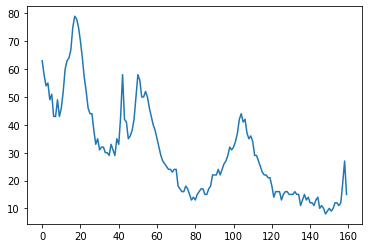

In [7]:
import matplotlib.pyplot as plt
diff = []
for i in range(len(l) - 1):
    diff.append(l[i + 1] - l[i])

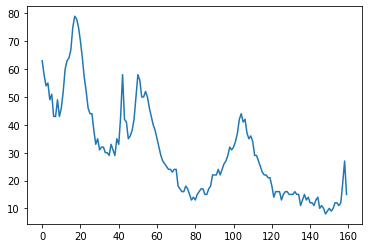

In [8]:
plt.plot(diff)

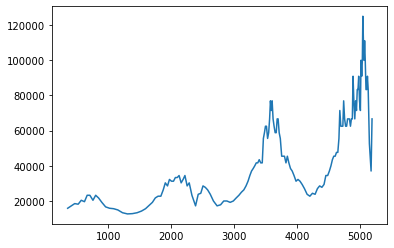

In [17]:
import numpy as np
diff = np.array(diff)
rate = 1e6 / diff
plt.plot(l[1:],rate)
